<a href="https://colab.research.google.com/github/hamdi-trikii/sampleOf_ML_Basics_projects/blob/main/ML_AI_Foundations_Section5_Lab5_Triki_hamdi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objecives:**

    -Load and preprocess image data

    -Build a feedforward neural network using Keras

    -Train and evaluate the model

    -Visualize learning curves and predictions

    -Understand the impact of model architecture (hidden layers, neurons, activation)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


In [ ]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


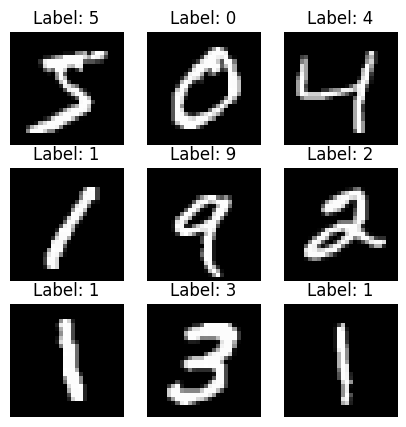

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
# Visualize a few digits
plt.figure(figsize=(5,5))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()


Step 2 — Preprocess data

- Normalize pixel values
- One-hot encode labels

In [ ]:

X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)


Step 3 — Build a simple neural network

In [ ]:

model = Sequential([
    Flatten(input_shape=(28,28)),          # Flatten image to vector (784,)
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),         # Hidden layer
    Dense(64, activation='relu'),          # Hidden layer
    Dense(10, activation='softmax')        # Output layer (10 classes)
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#btw the optimizer defines how weights are updated.
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

Step 4 — Train the model

In [ ]:
history = model.fit(X_train, y_train_cat,
                    validation_split=0.1,
                    epochs=20,
                    batch_size=128,
                    verbose=2)


Epoch 1/20
422/422 - 3s - 8ms/step - accuracy: 0.1124 - loss: 2.3016 - val_accuracy: 0.1050 - val_loss: 2.3022
Epoch 2/20
422/422 - 2s - 5ms/step - accuracy: 0.1132 - loss: 2.3013 - val_accuracy: 0.1050 - val_loss: 2.3022
Epoch 3/20
422/422 - 3s - 6ms/step - accuracy: 0.1132 - loss: 2.3013 - val_accuracy: 0.1050 - val_loss: 2.3022
Epoch 4/20
422/422 - 3s - 6ms/step - accuracy: 0.1132 - loss: 2.3013 - val_accuracy: 0.1050 - val_loss: 2.3021
Epoch 5/20
422/422 - 5s - 11ms/step - accuracy: 0.1132 - loss: 2.3012 - val_accuracy: 0.1050 - val_loss: 2.3019
Epoch 6/20
422/422 - 3s - 6ms/step - accuracy: 0.1132 - loss: 2.3009 - val_accuracy: 0.1050 - val_loss: 2.3009
Epoch 7/20
422/422 - 2s - 5ms/step - accuracy: 0.1283 - loss: 2.2926 - val_accuracy: 0.1902 - val_loss: 2.2583
Epoch 8/20
422/422 - 2s - 6ms/step - accuracy: 0.2370 - loss: 2.0697 - val_accuracy: 0.2813 - val_loss: 1.9043
Epoch 9/20
422/422 - 2s - 4ms/step - accuracy: 0.2952 - loss: 1.8690 - val_accuracy: 0.3000 - val_loss: 1.8323


Step 5 — Visualize training curves


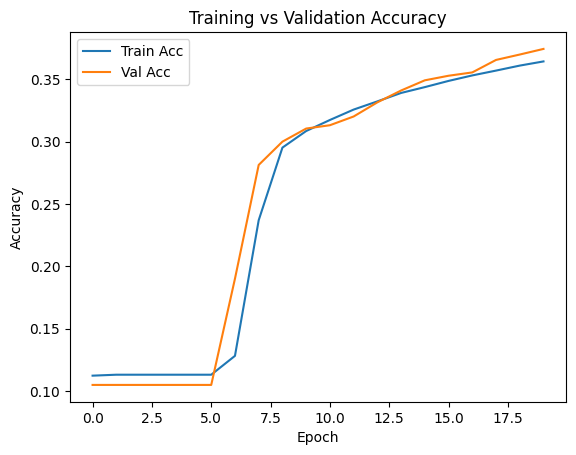

In [ ]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

Step 6 — Evaluate on test data


In [ ]:

test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
# The verbose=0 argument ensures that no progress bar or output is displayed during the evaluation process.
print(f"Test Accuracy: {test_acc:.3f}")

Test Accuracy: 0.360


Step 7 — Predict on new samples


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


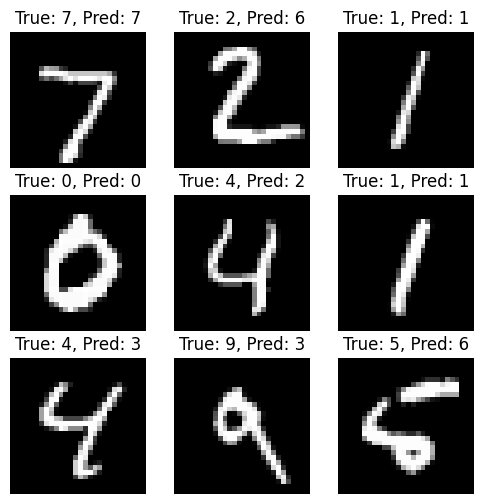

In [ ]:
preds = model.predict(X_test[:9])
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"True: {y_test[i]}, Pred: {np.argmax(preds[i])}")
    plt.axis('off')
plt.show()

**Step 8 — Experiment with architecture**

- Try adding/removing layers
- Change neurons (e.g., 256 → 128)
- Use different activation ( tanh , sigmoid )
- Increase epochs

👉
Observe how accuracy and overfitting change

Step 9 — Reflection Questions
1. What preprocessing steps were essential before training?

2. How did ReLU activation help compared to others?
3. Did validation accuracy differ from training accuracy? Why?
4. What happened when you added more layers or neurons?
5. What would you try next to improve performance (hint: CNNs)?

In [ ]:
model.save('my_model_mnist_nn.keras')